In [1]:
## This makes Figures 2 of the LVDB overview paper

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.table as table

In [3]:
## make good looking plots
plt.style.use('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [4]:
## consistent labels and colors
color_dsph_mw = 'tab:blue'
color_dsph_m31 = 'tab:orange'
color_dsph_lf = 'tab:green'
color_dsph_lf_distant = 'tab:red'

color_gc_disk = 'tab:purple'
color_gc_harris = 'tab:brown'
color_gc_ufcss = 'tab:olive'

color_gc_dwarf = 'tab:pink'
color_gc_lmc_smc = 'tab:grey'

label_dsph_mw = r'${\rm MW~Satellite}$'
label_dsph_m31 = r'${\rm M31~Satellite}$'
label_dsph_lf = r'${\rm Local~Field/Isolated}$'
label_dsph_lf_distant = r'${\rm Dwarf~Distant}$'
label_gc_ufcss = r'${\rm UFCSS}$'
label_gc_harris = r'${\rm GC~Harris}$'
label_gc_disk =r'${\rm GC~New~Disk}$'
label_gc_lmc_smc =r'${\rm GC~LMC/SMC}$'
label_gc_dwarf =r'${\rm GC~Dwarf}$'

In [5]:
## load latest files from github
dsph_mw = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_mw.csv')
dsph_m31 = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_m31.csv')
dsph_lf = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field.csv')
gc_ufsc = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_ufsc.csv')
gc_disk = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_disk.csv')
gc_harris = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_harris.csv')


In [6]:
## load and combine tables
dwarf_all = table.Table.read('/Users/apace/Documents/local_volume_database//data/dwarf_all.csv')
lf_distant = table.Table.read('/Users/apace/Documents/local_volume_database//data/dwarf_local_field_distant.csv')

x = ['ref_proper_motion']
dwarf_all.remove_columns(x)
lf_distant.remove_columns(x)
comb = table.vstack((dwarf_all, lf_distant))

In [7]:
## NGC 253 satellites
comb_ngc253 = comb[comb['host']=='ngc_0253']
len(comb_ngc253)

20

In [8]:
## MW satellites (includes LMC)
comb_mw_extra = comb[np.logical_or(comb['host']=='mw',comb['host']=='lmc') ]
len(comb_mw_extra), len(dsph_mw)

(65, 65)

In [9]:
## MW satellites (includes LMC)
comb_m31_extra = comb[np.logical_or(comb['host']=='m_031',comb['host']=='m_033') ]
len(comb_m31_extra), len(dsph_m31)
## note that this excludes M33 which isn't in the standard table

(40, 40)

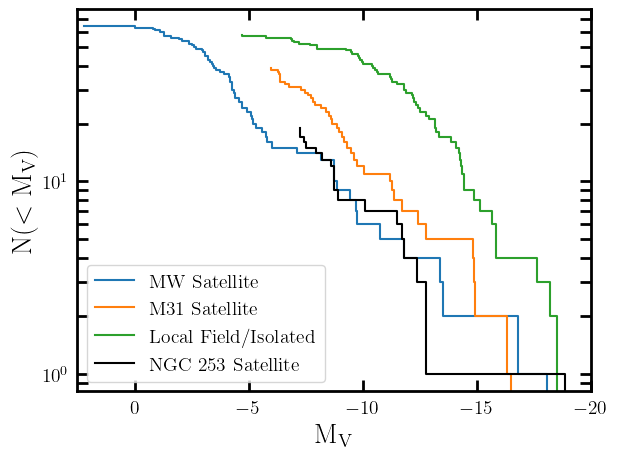

In [10]:
for i,j,k in zip([comb_mw_extra, comb_m31_extra, dsph_lf, comb_ngc253], [color_dsph_mw, color_dsph_m31, color_dsph_lf, 'k',], [label_dsph_mw, label_dsph_m31, label_dsph_lf, r'{\rm NGC~253~Satellite}']):
    sorted_data = np.sort(i['M_V']) 
    plt.step(sorted_data, np.arange(sorted_data.size), label=k, c=j)
    
    ## the structure here with satellite array, color, and label can be used to extend this to other systems

plt.xlim(2.5, -20)
plt.yscale('log')
plt.xlabel(r'${\rm  M_V}$')
plt.ylabel(r'${\rm N(<M_V)}$')
plt.legend(loc=3)
plt.tight_layout()
plt.savefig('plots/cumulative_distribution.pdf')
plt.show()